In [1]:
import numpy as np
import numpy.linalg as mat
import matplotlib.pyplot as plt
xx = np.array([1,2,3,4]);
print(xx)
np.power(xx,2.23)

[1 2 3 4]


array([ 1.        ,  4.6913398 , 11.58725056, 22.00866909])

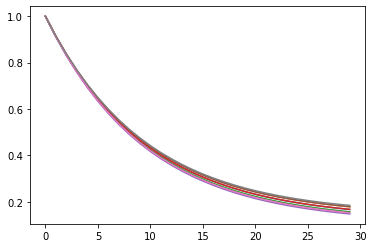

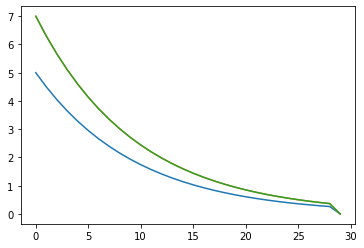

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as mat
import scipy.linalg as smat

A = np.array([[1,3,-1,1,-3,3,-2,4],
              [2,4,2,-2,4,-4,-2,4], 
              [1,1,1,1,1,1,1,1]]);

AT = A.T

y = np.array([1,1,1]); #,1]);

n,m = AT.shape;


T = 30;
xs = np.zeros([T,n]);
vs = np.zeros([T,m]);
Axys = np.zeros([T,m]);
xs[0] = np.ones(n);
vs[0] = np.ones(m);
dxs = np.zeros([T,n]);
dvs = np.zeros([T,m]);
us = np.zeros(T);
frac = 2;
gam = 0.1;
mu = 1;


def Df(x): return mu*frac*np.power(x,frac-1)-np.power(x,-1);
def D2f(x): return mu*frac*(frac-1)*np.diag(np.power(x,frac-2))+np.eye(n)+np.power(x,-2);

# def Df(x): return mu*(np.log(x) + np.ones(len(x)))-np.power(x,-1);
# def D2f(x): return mu*np.diag(1./x)+np.power(x,-2)
def D2fi(x): return mat.pinv(D2f(x))
#(1./(frac*(frac-1)))*np.diag(np.power(x,2-frac)) + np.eye(n);

def coord2n(y, AT):
    for t in range(T-1):
        x = xs[t];
        v = vs[t];
        Axys[t] = A@x-y;
        df= Df(x);
        Qi= D2fi(x);
        M = A@Qi@AT;
        Mi= mat.pinv(M);
        dxs[t] = (Qi - Qi@AT@Mi@A@Qi)@df + Qi@AT@Mi@(A@x-y);
        dvs[t] = Mi@A@Qi@df + v - Mi@(A@x-y);
        xs[t+1] = xs[t] - gam*dxs[t];
        vs[t+1] = vs[t] - gam*dvs[t];
        
        
coord2n(y,AT)
plt.figure(1)
plt.plot(xs)
plt.figure(2)
plt.plot(Axys)

In [27]:
interact(friends, name='Dan',number=(5,10));

interactive(children=(Text(value='Dan', description='name'), IntSlider(value=7, description='number', max=10, …

In [30]:
arml = 2; armw = 0.4; depth = 0.05; rrad = 0.8;
shape = np.array([[ arml,0.5*armw],[0.5*armw,0.5*armw],[0.5*armw,arml],[-0.5*armw,arml],[-0.5*armw,0.5*armw],
                  [-arml,0.5*armw],[-arml,-0.5*armw],[-0.5*armw,-0.5*armw],[-0.5*armw,-arml],[0.5*armw,-arml],
                  [0.5*armw,-0.5*armw],[arml,-0.5*armw]]);

quad_frame = [np.vstack([shape.T,depth*np.ones(np.size(shape,0))]).T,
              np.vstack([shape.T,-depth*np.ones(np.size(shape,0))]).T];

#               np.array([[arml,-0.5*armw,depth],[arml,0.5*armw,depth],[arml,0.5*armw,-depth],[arml,-0.5*armw,-depth]]),
#               np.array([[-arml,-0.5*armw,depth],[-arml,0.5*armw,depth],[-arml,0.5*armw,-depth],[-arml,-0.5*armw,-depth]]),              
#               np.array([[0.5*armw,arml,depth],[-0.5*armw,arml,depth],[-0.5*armw,arml,-depth],[0.5*armw,arml,-depth]]),
#               np.array([[0.5*armw,-arml,depth],[-0.5*armw,-arml,depth],[-0.5*armw,-arml,-depth],[0.5*armw,-arml,-depth]])];

# ROTORS...
thetas = np.linspace(0,2*np.pi,10);
rotor = rrad*np.einsum('ij,kj',np.eye(2),np.array([[np.cos(theta),np.sin(theta)] for theta in thetas])).T;
rotor = np.vstack([rotor.T,1.2*depth*np.ones(np.size(rotor,0))]).T;
#print(rotor)

perc = 0.9; rdepth = 0.05;
quad_attach = [np.array([perc*arml,0  ,1.*depth]),
               np.array([0,perc*arml  ,1.*depth]),
               np.array([-perc*arml,0 ,1.*depth]),
               np.array([0,-perc*arml ,1.*depth])];

quad_rotors = [rotor + np.outer(np.ones(np.size(rotor,0)),quad_attach[0]),
               rotor + np.outer(np.ones(np.size(rotor,0)),quad_attach[1]),
               rotor + np.outer(np.ones(np.size(rotor,0)),quad_attach[2]),
               rotor + np.outer(np.ones(np.size(rotor,0)),quad_attach[3])]
#                rotor + np.outer(np.ones(np.size(rotor,0)),quad_attach[0]+np.array([0,0,rdepth])),
#                rotor + np.outer(np.ones(np.size(rotor,0)),quad_attach[1]+np.array([0,0,rdepth])),
#                rotor + np.outer(np.ones(np.size(rotor,0)),quad_attach[2]+np.array([0,0,rdepth])),
#                rotor + np.outer(np.ones(np.size(rotor,0)),quad_attach[3]+np.array([0,0,rdepth])),]

shaft = 0.2
quad_centers = [shaft*rotor + np.outer(np.ones(np.size(rotor,0)),quad_attach[0]),
                shaft*rotor + np.outer(np.ones(np.size(rotor,0)),quad_attach[1]),
                shaft*rotor + np.outer(np.ones(np.size(rotor,0)),quad_attach[2]),
                shaft*rotor + np.outer(np.ones(np.size(rotor,0)),quad_attach[3])];
#                 shaft*rotor + np.outer(np.ones(np.size(rotor,0)),quad_attach[0]+np.array([0,0,rdepth])),
#                 shaft*rotor + np.outer(np.ones(np.size(rotor,0)),quad_attach[1]+np.array([0,0,rdepth])),
#                 shaft*rotor + np.outer(np.ones(np.size(rotor,0)),quad_attach[2]+np.array([0,0,rdepth])),
#                 shaft*rotor + np.outer(np.ones(np.size(rotor,0)),quad_attach[3]+np.array([0,0,rdepth])),]


quad_shapes = [quad_frame,quad_rotors,quad_centers];


# FUNCTION TO 
def draw_quad(quad_shapes,AXES3D,loc=np.zeros(3),R=np.eye(3),size=1):
    
    for j in range(len(quad_shapes)):
        shapes = quad_shapes[j];
        for i in range(len(shapes)):
            pts = size*shapes[i];
            pts = np.dot(pts,R.T);
            pts = pts + np.outer(np.ones(np.size(pts,0)),loc);
            pts = np.dot(pts,AXES3D);
            ax.add_patch(Polygon(list(pts),closed=True,facecolor='grey',
                            linestyle='-',edgecolor='black',linewidth=2,alpha=.5,fill=True,zorder=10));
            
            
#### CONSTRUCTING BACKGROUND OBJECTS....
#### CONSTRUCTING BACKGROUND OBJECTS....
#### CONSTRUCTING BACKGROUND OBJECTS....
#### CONSTRUCTING BACKGROUND OBJECTS....




corner = 15*np.array([-1,-1,0]);
wallx = 30; wally = 30; wallz = 20; 
floor  = np.vstack([corner,
                    corner+ np.array([wallx,0 ,0]),
                    corner+ np.array([wallx,wally,0]),
                    corner+ np.array([0,wally,0])]);

wall1  = np.vstack([corner,
                    corner+ np.array([0,wally,0]),
                    corner+ np.array([0,wally,wallz]),
                    corner+ np.array([0,0,wallz])]);

wall2  = np.vstack([corner,
                    corner+ np.array([wallx,0,0]),
                    corner+ np.array([wallx,0,wallz]),
                    corner+ np.array([0,0,wallz])]);

background_objects = [[floor]]; #,wall1,wall2]];



square = np.array([[0,0,0],[1,0,0],[1,1,0],[0,1,0]]);
thetas = np.linspace(0,2*np.pi,10);
circle = np.array([[np.cos(theta),np.sin(theta),0] for theta in thetas]);

cube = np.array([square ,
        square + np.outer(np.ones(4),np.eye(3)[2]),
        np.dot(square,np.array([[0,0,1],[1,0,0],[0,1,0]])),
        np.dot(square,np.array([[0,0,1],[1,0,0],[0,1,0]])) + np.outer(np.ones(4),np.eye(3)[1]),
        np.dot(square,np.array([[0,1,0],[0,0,1],[1,0,0]])),
        np.dot(square,np.array([[0,1,0],[0,0,1],[1,0,0]])) + np.outer(np.ones(4),np.eye(3)[0])]);

cube = 5*cube;

sphere_skel = np.array([circle ,
                   np.dot(circle,np.array([[0,0,1],[1,0,0],[0,1,0]])),
                   np.dot(circle,np.array([[0,1,0],[0,0,1],[1,0,0]]))]);

thetas = np.linspace(0,2*np.pi,8);


sphere = [];
for th in thetas:
    ROTx = np.array([[1,0,0],[0,np.cos(th),np.sin(th)],[0,-np.sin(th),np.cos(th)]]);
    sphere.append(np.dot(sphere_skel[0],ROTx));
for th in thetas:
    ROTy = np.array([[np.cos(th),0,np.sin(th)],[0,1,0],[-np.sin(th),0,np.cos(th)]]);
    sphere.append(np.dot(sphere_skel[1],ROTy));
for th in thetas:
    ROTz = np.array([[np.cos(th),np.sin(th),0],[-np.sin(th),np.cos(th),0],[0,0,1]]);
    sphere.append(np.dot(sphere_skel[2],ROTz));

sphere = np.array(sphere);
sphere = 4*sphere;


environment_objects = [cube,cube]; #,sphere];
object_locations = [np.array([7,-7,0]),np.array([-11,-11,0]),np.array([0,0,14])];




def draw_environment(objects,AXES3D,alpha=0.1,fill=True,shifts=[]):    
    for j in range(len(objects)):
        shapes = objects[j];
        if len(shifts)!=0: shift = shifts[j];
        else: shift = np.zeros(3);
        for i in range(len(shapes)):
            #size = 1; if not(len(sizes)==0): size=sizes[j][i];                
            pts = shapes[i];
            pts = pts + np.outer(np.ones(np.size(pts,0)),shift);
            pts = np.dot(pts,AXES3D);
            ax.add_patch(Polygon(list(pts),closed=True,facecolor='grey',
                            linestyle='-',edgecolor='black',linewidth=1,alpha=alpha,fill=fill,zorder=0));

            

#### CONSTRUCTING SAMPLE TRAJECTORYIES USING BEZIER CURVES....
#### CONSTRUCTING SAMPLE TRAJECTORYIES USING BEZIER CURVES....
#### CONSTRUCTING SAMPLE TRAJECTORYIES USING BEZIER CURVES....
#### CONSTRUCTING SAMPLE TRAJECTORYIES USING BEZIER CURVES....



scale = 10;
start_points  = np.zeros((3,3));
finish_points = scale*np.outer(1.2*np.ones(3),np.array([0,0,1]));



T = 100; K = 7;
ts = np.linspace(0,1,T);
ks = np.linspace(0,1,K);


nwaypts = 50;
thetas = np.linspace(0,4*np.pi,nwaypts);
waypts = np.zeros([3,nwaypts,3])
ellips = np.array([[1,1,1],[2,1,1],[1,2,1]]);

for i in range(3):
    waypts[i,:,:] = scale*np.einsum('ij,jk',np.array([[np.cos(theta),np.sin(theta),0.1*theta] for theta in thetas]),np.diag(ellips[i]));
    
waypts[:,0,:] = start_points; #np.zeros((3,3));
waypts[:,-1,:] = finish_points; #height*np.outer(np.ones(3),np.array([0,0,1]));
    
skeletons = np.zeros((np.size(waypts,0),T,3)); nn = np.size(waypts,1);
for s in range(np.size(waypts,0)):
    for i in range(np.size(waypts,1)):
        skeletons[s,:,:] += np.outer((np.math.factorial(nn-1)/(np.math.factorial(i)*np.math.factorial(nn-1-i)))*np.power(ts,i)*np.power(1-ts,nn-1-i),waypts[s,i]);

trajs = np.zeros((K,T,3));
S = np.size(skeletons,0);
for s in range(S):
    trajs[:,:,:] += np.einsum('i,jk',(np.math.factorial(S-1)/(np.math.factorial(s)*np.math.factorial(S-1-s)))*np.power(ks,s)*np.power(1-ks,S-1-s),skeletons[s,:,:]);    
    

BB = np.array([[1.,1.,1],[1,-1,0],[0,0,0]]); BB[2] = np.cross(BB[0],BB[1]);
BB = np.dot(np.diag(1/np.sqrt(np.diag(np.dot(BB,BB.T)))),BB).T;  # normalize

trajRs = np.zeros((K,T,3,3));
for k in range(K):
    trajRs[k,0,:,:] = np.eye(3);
    for t in range(T)[1:]:
        temp1 = trajs[k,t]-trajs[k,t-1]; temp1 = (1./mat.norm(temp1))*temp1;
        temp2 = np.cross(temp1,np.array([0,0,1])); temp2 = (1./mat.norm(temp2))*temp2;
        temp3 = np.cross(temp1,temp2); temp3 = (1./mat.norm(temp3))*temp3;
        WW    = np.vstack([temp1,temp2,temp3]).T;
        trajRs[k,t,:,:] = np.dot(WW,BB.T);

        
        
        
        

######################################
###### MAIN CODE....##################
######################################


#def plot3D(t,k,sx,sw,xangle,wangle,xslice,wslice,rot,vert,zoom):
def plot3D(t,k,rot,vert,zoom,show_quad,show_env,show_objs,quad_size):        
    
    
    plt.cla() # CLEAR FIGURE...
    # SET ZOOM SCALE...
    xlims = zoom*scale*base_xlims; ylims = zoom*scale*base_ylims;
    ax.set_xlim(xlims); ax.set_ylim(ylims); 
    
    
    # CAMERA ORIENTATION TRANSFORMATIONS    
    # View angle...
    up  = np.array([0,0,1]);  # DEFINES UP DIRECTION
    cam = np.array([np.cos(vert)*np.cos(rot),np.cos(vert)*np.sin(rot),np.sin(vert)]); # DEFINES CAMERA LOCATION IN 3D SPACE
    
    # CONSTRUCTING PROJECTION MATRIX ONTO CAMERA VIEWING PLANE...
    AXES3D = np.eye(3); AXES3D[2] = -cam;
    AXES3D[0] = np.cross(up,cam); AXES3D[1] = np.cross(cam,AXES3D[0]);
    AXES3D = np.dot(np.diag(1/np.sqrt(np.diag(np.dot(AXES3D,AXES3D.T)))),AXES3D);  # normalize
    AXES3D = AXES3D.T[:,:2];
    
    
    # QUADROTOR LOCATION AND ORIENTATION 
    loc = trajs[k,t]; R = trajRs[k,t];
    
    # DRAWING QUAD MODEL FROM quad_shapes AT loc WITH ORIENTATION R PROJECTED ONTO CAMERA PLANE USING AXES3D
    if show_quad:
        draw_quad(quad_shapes,AXES3D,loc=loc,R=R,size=quad_size)

    # DRAWING TRAJECTORIES PROJECTED ONTO CAMERA PLANE USING AXES3D
    for j in range(np.size(trajs,0)):
        if j == k:
            alpha = 1.; linewidth=5; linestyle='-'
        else: 
            alpha = 0.3; linewidth = 1; linestyle='-';
        #alpha = k/np.size(trajs,0);
        pts = np.dot(trajs[j],AXES3D); plt.plot(pts[:,0],pts[:,1],linestyle,linewidth=linewidth,alpha=alpha,color='blue');
        
    # DRAWING ENVIRONMENT...
    if show_env:
        draw_environment(background_objects,AXES3D)

    # DRAWING ENVIRONMENT OBJECTS...
    if show_objs:
        draw_environment(environment_objects,AXES3D,alpha=0.1,shifts = object_locations);


        
#### IPYWIDGETS INTERACTION...               
time_length   = Layout(width='900px');
orient_length = Layout(width='400px');

In [31]:
figsize = (7,7);
base_xlims = np.array([-2,2]); ylims = base_ylims = np.array([-0.5,3.]);
fig,ax = plt.subplots(1,figsize=figsize);

interact(plot3D,
           t      = widgets.IntSlider(min= 0,max=T-1,step=1,value=0,description='Time Step',layout=Layout(width='900px')),
           k      = widgets.IntSlider(min=  0,max= K-1,step=1,value=0,description='Iteration'),
           show_quad = widgets.Checkbox(value=True,description='Show quad:'),
           show_env  = widgets.Checkbox(value=True,description='Show environment:'),         
           show_objs = widgets.Checkbox(value=True,description='Show objects:'),                  
           quad_size = widgets.FloatSlider(min=  0.2,max= 5,step=0.05,value=1,description='Quad Size'),
           zoom   = widgets.FloatLogSlider(min=  -1,max= 1,value=1,description='Zoom',layout=orient_length),         
           rot    = widgets.FloatSlider(min=  0,max= 2*np.pi,value=1,description='Orientation',layout=orient_length),         
           vert   = widgets.FloatSlider(min=  0,max= np.pi/2,value=np.pi/10,descrxiption='Vertical Angle',layout=orient_length));


# rows = []
# rows.append(HBox([dim_slider]));
# rows.append(HBox([zoom_slider]));
# rows.append(HBox([comb_choice,matrix_slider,shape_slider]));
# rows.append(HBox([show_char,show_expound]));
# rows.append(HBox([lambda_button,lambda_slider]));
# rows.append(HBox([show_projections,proj_slider]));
# rows.append(HBox([evolve_slider]));
# rows.append(HBox([sym_slider]));
# rows.append(HBox([uv_slider]));
# rows.append(HBox([VBox(layer_buttons[0]),VBox(layer_buttons[1]),VBox(layer_buttons[2]),
#                   decomp_select,snap_select]));                  
# #                  VBox(decomp_select),snap_select]));

# ig.min_aspect_ratio = 1;
# #pts.on_drag(pts_drag_start);
# pts.on_drag_end(pts_drag_end);

# #pts.observe(foo,'x');Lwj
# pts.enable_move = True


# display(fig)
# display(ui)



        

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(IntSlider(value=0, description='Time Step', layout=Layout(width='900px'), max=99), IntSl…